# Prove ML per tesi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Si parte dal precedente progetto "Elaborazione del segnale EEG con metodi supervisionati per la classificazione dei pazienti di Alzheimer". Si individuano alcuni dei classificaori utilizzati, per eseguerire k-fold cross validation unita alla greadsearchCV per individuare gli iperparametri ottimali con i quali addestrare i classificatori e alla fine eseguire i modelli.

Si esegue l'import delle principali librerie utilizzate per il progetto di machine learning

In [ ]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from scipy.fftpack import fft, ifft, fftfreq,rfft
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, \
    recall_score, \
    accuracy_score, f1_score

# Lets import some modules for basic computation
import time


import pickle

# Some modules for plotting and visualizing
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# And some Machine Learning modules from scikit-learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import KernelPCA

## Principali funzioni di utilità

In [ ]:
def tuning_albero_decisione(caso,numerocv):
    ncv=numerocv
    if caso==1:
       X_traina=X_train_caso1
       y_traina=y_train_caso1
       X_testa=X_test_caso1
       y_testa=y_test_caso1
    if caso==2:
       X_traina=X_train_caso2
       y_traina=y_train_caso2
       X_testa=X_test_caso2
       y_testa=y_test_caso2
    if caso==3:
       X_traina=X_train_caso3
       y_traina=y_train_caso3  
       X_testa=X_test_caso3
       y_testa=y_test_caso3   
    if caso==4:
       X_traina=X_train_caso4
       y_traina=y_train_caso4   
       X_testa=X_test_caso4
       y_testa=y_test_caso4     
     
    print ("stimatore utilizzato - DecisionTreeClassifier") 
    parametri1 = {"criterion":["gini","entropy"],
              "max_depth": [3,4,5,10]}

    parametri = {"criterion":["gini","entropy"],
              "max_depth": [3,4,5,10],
              "min_samples_leaf":[1,2,3],
              "min_samples_split":[1,2,3],
              "min_weight_fraction_leaf":[0,1,2]
              }

    cercap = GridSearchCV(estimator=DecisionTreeClassifier(), 
                  param_grid=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=ncv,
                  verbose=1,
                  n_jobs=-1)
    gs = cercap.fit(X_traina, y_traina)
    print('Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: %.3f' % gs.best_score_)
    print(gs.best_params_)


    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    
  
    print('Accuratezza con dati di Test: %.3f' % clf.score(X_testa, y_testa))

    y_true, y_pred = y_testa , clf.predict(X_testa)
    
    print('Risultato sui dati di test:')
    print(classification_report(y_true, y_pred))

    target_names = ['Positivo','Negativo']
    print(confusion_matrix(y_testa,y_pred))
    matrice=confusion_matrix(y_testa,y_pred)
        #print(y_test,y_pred)
    tp=matrice[0,0]
    fn=matrice[0,1]
    fp=matrice[1,0]
    tn=matrice[1,1]
         
        #print(tp,fp,fn,tn)
    accurancy=int(((tp+tn)/(tn+fp+fn+tp))*100)
    precision=int((tp/(tp+fp))*100)
    sensitivity=int((tp/(tp+fn))*100)
    specificity=int((tn/(tn+fp))*100)
    if (precision== 0 and sensitivity==0):
        f1score=0
    else:
        f1score=int(2*((precision * sensitivity)/(precision + sensitivity)))

    print('Accuratezza Test: %.3f' % accurancy)  
    print('Precisione  Test: %.3f' % precision)
    print('Sensitività Test: %.3f' % sensitivity)
    print('Specificità Test: %.3f' % specificity)
    print('F1 score    Test: %.3f' % f1score)
    #print(classification_report(y_test,y_pred,target_names=target_names))

In [ ]:
def tuning_albero_decisione_CV(caso,numerocv):
    ncv=numerocv
    if caso==1:
       X_traina=X_train_caso1
       y_traina=y_train_caso1
       X_testa=X_test_caso1
       y_testa=y_test_caso1
    if caso==2:
       X_traina=X_train_caso2
       y_traina=y_train_caso2
       X_testa=X_test_caso2
       y_testa=y_test_caso2
    if caso==3:
       X_traina=X_train_caso3
       y_traina=y_train_caso3  
       X_testa=X_test_caso3
       y_testa=y_test_caso3   
    if caso==4:
       X_traina=X_train_caso4
       y_traina=y_train_caso4   
       X_testa=X_test_caso4
       y_testa=y_test_caso4 

    parametri1 = {"criterion":["gini","entropy"],
              "max_depth": [3,4,5,10]}

    parametri = {"criterion":["gini","entropy"],
              "max_depth": [3,4,5,10],
              "min_samples_leaf":[1,2,3],
              "min_samples_split":[1,2,3],
              "min_weight_fraction_leaf":[0,1,2]}

    cercap = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), 
                  param_grid=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=2,
                  verbose=1,
                  n_jobs=-1)
    gs = cercap.fit(X_traina, y_traina)
    print(gs.best_score_)
    print(gs.best_params_)


    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
         
    #questa parte non viene eseguita in quanto  è stato già eseguita avendo imnpostato refit=True.
   

    scores = cross_val_score(gs, X_traina, y_traina, 
                         scoring='accuracy', cv=ncv)
    print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

    print('Test accuracy: %.3f' % clf.score(X_testa, y_testa))

In [ ]:
def tuning_SVM(caso,numerocv):
    ncv=numerocv
    if caso==1:
       X_trains=X_train_caso1
       y_trains=y_train_caso1
       X_tests=X_test_caso1
       y_tests=y_test_caso1
    if caso==2:
       X_trains=X_train_caso2
       y_trains=y_train_caso2
       X_tests=X_test_caso2
       y_tests=y_test_caso2
    if caso==3:
       X_trains=X_train_caso3
       y_trains=y_train_caso3  
       X_tests=X_test_caso3
       y_tests=y_test_caso3   
    if caso==4:
       X_trains=X_train_caso4
       y_trains=y_train_caso4   
       X_tests=X_test_caso4
       y_tests=y_test_caso4     

    print ("stimatore utilizzato - Support vector machine (SVC)") 
    parametri = {'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 
               'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 
               'kernel': ['linear','rbf']}

    parametri1 = {'kernel': ['linear','rbf']}

    #cercap = GridSearchCV(estimator=SVC(), 
    #              param_grid=parametri, 
    #              scoring='accuracy', 
    #              refit=True,
    #              cv=ncv,
    #              verbose=1,
    #              n_jobs=-1)
    cercap = RandomizedSearchCV(estimator=SVC(), 
                  param_distributions=parametri1, 
                  scoring='accuracy', 
                  refit=True,
                  cv=ncv,
                  verbose=1,
                  n_iter=20,
                  n_jobs=-1)
    gs = cercap.fit(X_trains, y_trains)
    print('Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: %.3f' % gs.best_score_)
    print(gs.best_params_)


    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    # note that we do not need to refit the classifier
    # because this is done automatically via refit=True.
    print('Accuratezza con dati di Test: %.3f' % clf.score(X_tests, y_tests))

    y_true, y_pred = y_tests , clf.predict(X_tests)
    
    print('Risultato sui dati di test:')
    print(classification_report(y_true, y_pred))

    target_names = ['Positivo','Negativo']
    print(confusion_matrix(y_tests,y_pred))
    matrice=confusion_matrix(y_tests,y_pred)
        #print(y_test,y_pred)
    tp=matrice[0,0]
    fn=matrice[0,1]
    fp=matrice[1,0]
    tn=matrice[1,1]
         
        #print(tp,fp,fn,tn)
    accurancy=int(((tp+tn)/(tn+fp+fn+tp))*100)
    precision=int((tp/(tp+fp))*100)
    sensitivity=int((tp/(tp+fn))*100)
    specificity=int((tn/(tn+fp))*100)
    if (precision== 0 and sensitivity==0):
        f1score=0
    else:
        f1score=int(2*((precision * sensitivity)/(precision + sensitivity)))

    print('Accuratezza Test: %.3f' % accurancy)  
    print('Precisione  Test: %.3f' % precision)
    print('Sensitività Test: %.3f' % sensitivity)
    print('Specificità Test: %.3f' % specificity)
    print('F1 score    Test: %.3f' % f1score)

In [ ]:
def tuning_SVM_1(caso,numerocv):
    ncv=numerocv
    if caso==1:
       X_trains=X_train_caso1
       y_trains=y_train_caso1
       X_tests=X_test_caso1
       y_tests=y_test_caso1
    if caso==2:
       X_trains=X_train_caso2
       y_trains=y_train_caso2
       X_tests=X_test_caso2
       y_tests=y_test_caso2
    if caso==3:
       X_trains=X_train_caso3
       y_trains=y_train_caso3  
       X_tests=X_test_caso3
       y_tests=y_test_caso3   
    if caso==4:
       X_trains=X_train_caso4
       y_trains=y_train_caso4   
       X_tests=X_test_caso4
       y_tests=y_test_caso4
    if caso==5:
       X_trains=X_train_caso5
       y_trains=y_train_caso5   
       X_tests=X_test_caso5
       y_tests=y_test_caso5       

    print ("stimatore utilizzato - Support vector machine (SVC)")
    parametri = {'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 
               'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 
               'kernel': ['linear','rbf']}

    parametri1 = {'C': [1000.0], 
               'gamma': [0.001], 
               'kernel': ['rbf']}

    cercap = GridSearchCV(estimator=SVC(), 
                  param_grid=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=ncv,
                  verbose=1,
                  n_jobs=-1)
    #cercap = RandomizedSearchCV(estimator=SVC(), 
    #              param_distributions=parametri, 
    #              scoring='accuracy', 
    #              refit=True,
    #              cv=ncv,
    #              verbose=1,
    #              n_iter=20,
    #              n_jobs=-1)
    gs = cercap.fit(X_trains, y_trains)
    print('Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: %.3f' % gs.best_score_)
    print(gs.best_params_)


    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    # note that we do not need to refit the classifier
    # because this is done automatically via refit=True.
    print('Accuratezza con dati di Test: %.3f' % clf.score(X_tests, y_tests))

    y_true, y_pred = y_tests , clf.predict(X_tests)
    
    print('Risultato sui dati di test:')
    print(classification_report(y_true, y_pred))

    target_names = ['Positivo','Negativo']
    print(confusion_matrix(y_tests,y_pred))
    matrice=confusion_matrix(y_tests,y_pred)
        #print(y_test,y_pred)
    if caso !=5:
        tp=matrice[0,0]
        fn=matrice[0,1]
        fp=matrice[1,0]
        tn=matrice[1,1]
            
            #print(tp,fp,fn,tn)
        accurancy=int(((tp+tn)/(tn+fp+fn+tp))*100)
        precision=int((tp/(tp+fp))*100)
        sensitivity=int((tp/(tp+fn))*100)
        specificity=int((tn/(tn+fp))*100)
        if (precision== 0 and sensitivity==0):
            f1score=0
        else:
            f1score=int(2*((precision * sensitivity)/(precision + sensitivity)))

        print('Accuratezza Test: %.3f' % accurancy)  
        print('Precisione  Test: %.3f' % precision)
        print('Sensitività Test: %.3f' % sensitivity)
        print('Specificità Test: %.3f' % specificity)
        print('F1 score    Test: %.3f' % f1score)

In [ ]:
def tuning_foresta(caso,numerocv):
    ncv=numerocv
    if caso==1:
       X_trainf=X_train_caso1
       y_trainf=y_train_caso1
       X_testf=X_test_caso1
       y_testf=y_test_caso1
    if caso==2:
       X_trainf=X_train_caso2
       y_trainf=y_train_caso2
       X_testf=X_test_caso2
       y_testf=y_test_caso2
    if caso==3:
       X_trainf=X_train_caso3
       y_trainf=y_train_caso3  
       X_testf=X_test_caso3
       y_testf=y_test_caso3   
    if caso==4:
       X_trainf=X_train_caso4
       y_trainf=y_train_caso4   
       X_testf=X_test_caso4
       y_testf=y_test_caso4     

     
    parametri = {"max_depth": [8, 12, None],
                 "max_features": [1, 3, 10],
                 "min_samples_split": [1, 3, 10],
                 "min_samples_leaf": [1, 3, 10],
                 "bootstrap": [True, False],
                 "criterion": ["gini", "entropy"],
                 "n_estimators": [20, 40, 80]}
  

    #cercap = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
    #              param_grid=parametri, 
    #              scoring='accuracy', 
    #              refit=True,
    #              cv=ncv,
    #              verbose=1,
    #              n_jobs=-1)
    cercap = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), 
                  param_distributions=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=ncv,
                  verbose=1,
                  n_iter=20,
                  n_jobs=-1)
    
   
    gs = cercap.fit(X_trainf, y_trainf)
    print('Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: %.3f' % gs.best_score_)
    print(gs.best_params_)


    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    
    print('Accuratezza con dati di Test: %.3f' % clf.score(X_testf, y_testf))

    y_true, y_pred = y_testf , clf.predict(X_testf)
    
    print('Risultato sui dati di test:')
    print(classification_report(y_true, y_pred))

    target_names = ['Positivo','Negativo']
    print(confusion_matrix(y_testf,y_pred))
    matrice=confusion_matrix(y_testf,y_pred)
        #print(y_test,y_pred)
    tp=matrice[0,0]
    fn=matrice[0,1]
    fp=matrice[1,0]
    tn=matrice[1,1]
         
        #print(tp,fp,fn,tn)
    accurancy=int(((tp+tn)/(tn+fp+fn+tp))*100)
    precision=int((tp/(tp+fp))*100)
    sensitivity=int((tp/(tp+fn))*100)
    specificity=int((tn/(tn+fp))*100)
    if (precision== 0 and sensitivity==0):
        f1score=0
    else:
        f1score=int(2*((precision * sensitivity)/(precision + sensitivity)))

    print('Accuratezza Test: %.3f' % accurancy)  
    print('Precisione  Test: %.3f' % precision)
    print('Sensitività Test: %.3f' % sensitivity)
    print('Specificità Test: %.3f' % specificity)
    print('F1 score    Test: %.3f' % f1score)


In [ ]:
def tuning_SVM_CV(caso,numerocv):
    ncv=numerocv
    if caso==1:
       X_train=X_train_caso1
       y_train=y_train_caso1
       X_test=X_test_caso1
       y_test=y_test_caso1
    if caso==2:
       X_train=X_train_caso2
       y_train=y_train_caso2
       X_test=X_test_caso2
       y_test=y_test_caso2
    if caso==3:
       X_train=X_train_caso3
       y_train=y_train_caso3  
       X_test=X_test_caso3
       y_test=y_test_caso3   
    if caso==4:
       X_train=X_train_caso4
       y_train=y_train_caso4   
       X_test=X_test_caso4
       y_test=y_test_caso4 

    range_valori = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

    parametri = {'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 
               'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 
               'kernel': ['linear','rbf']}

  

    cercap = GridSearchCV(estimator=SVC(), 
                  param_grid=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=2,
                  verbose=1,
                  n_jobs=-1)
    
    gs = cercap.fit(X_train, y_train)
    print(gs.best_score_)
    print(gs.best_params_)


    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    

    scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=ncv)
    print('Accuratezza fase di Cross Validation con dati di Addestramento/Validazione:: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

    print('Accuratezza con dati di Test: %.3f' % clf.score(X_test, y_test))

In [ ]:
def tuning_KNN(caso,numerocv):
    ncv=numerocv

    if caso==1:
       X_traink=X_train_caso1
       y_traink=y_train_caso1
       X_testk=X_test_caso1
       y_testk=y_test_caso1
    if caso==2:
       X_traink=X_train_caso2
       y_traink=y_train_caso2
       X_testk=X_test_caso2
       y_testk=y_test_caso2
    if caso==3:
       X_traink=X_train_caso3
       y_traink=y_train_caso3  
       X_testk=X_test_caso3
       y_testk=y_test_caso3   
    if caso==4:
       X_traink=X_train_caso4
       y_traink=y_train_caso4   
       X_testk=X_test_caso4
       y_testk=y_test_caso4     

    print ("stimatore utilizzato - KNeighborsClassifier")   
    parametri = {
             'n_neighbors' : [5, 20],
             'weights': ['uniform', 'distance'],
             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
              }

    cercap = GridSearchCV(estimator=KNeighborsClassifier(), 
                  param_grid=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=ncv,
                  verbose=1,
                  n_jobs=-1)
    
    gs = cercap.fit(X_traink, y_traink)
    print('Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: %.3f' % gs.best_score_)
    print(gs.best_params_)


    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    
    print('Accuratezza con dati di Test: %.3f' % clf.score(X_testk, y_testk))

    y_true, y_pred = y_testk , clf.predict(X_testk)
    
    print('Risultato sui dati di test:')
    print(classification_report(y_true, y_pred))

    target_names = ['Positivo','Negativo']
    print(confusion_matrix(y_testk,y_pred))
    matrice=confusion_matrix(y_testk,y_pred)
        #print(y_test,y_pred)
    tp=matrice[0,0]
    fn=matrice[0,1]
    fp=matrice[1,0]
    tn=matrice[1,1]
         
        #print(tp,fp,fn,tn)
    accurancy=int(((tp+tn)/(tn+fp+fn+tp))*100)
    precision=int((tp/(tp+fp))*100)
    sensitivity=int((tp/(tp+fn))*100)
    specificity=int((tn/(tn+fp))*100)
    if (precision== 0 and sensitivity==0):
        f1score=0
    else:
        f1score=int(2*((precision * sensitivity)/(precision + sensitivity)))

    print('Accuratezza Test: %.3f' % accurancy)  
    print('Precisione  Test: %.3f' % precision)
    print('Sensitività Test: %.3f' % sensitivity)
    print('Specificità Test: %.3f' % specificity)
    print('F1 score    Test: %.3f' % f1score)

In [ ]:
def tuning_MP(caso,numerocv):
    ncv=numerocv

    if caso==1:
       X_trainm=X_train_caso1
       y_trainm=y_train_caso1
       X_testm=X_test_caso1
       y_testm=y_test_caso1
    if caso==2:
       X_trainm=X_train_caso2
       y_trainm=y_train_caso2
       X_testm=X_test_caso2
       y_testm=y_test_caso2
    if caso==3:
       X_trainm=X_train_caso3
       y_trainm=y_train_caso3  
       X_testm=X_test_caso3
       y_testm=y_test_caso3   
    if caso==4:
       X_trainm=X_train_caso4
       y_trainm=y_train_caso4   
       X_testm=X_test_caso4
       y_testm=y_test_caso4     

    parametri = {  'hidden_layer_sizes': [(10,30,10),(20,)],
                    'activation': ['tanh', 'relu'],
                    'solver': ['sgd', 'adam'],
                    'alpha': [0.0001, 0.05, 0.1,1],
                    'learning_rate': ['constant','adaptive']
                  }

    cercap = GridSearchCV(estimator=MLPClassifier(max_iter=100), 
                  param_grid=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=ncv,
                  verbose=1,
                  n_jobs=-1)
    
    gs = cercap.fit(X_trainm, y_trainm)
    print('Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: %.3f' % gs.best_score_)
    print('I migliori parametri trvati sono :\n', gs.best_params_)
    #print(gs.best_params_)

    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    #for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    #    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

    
    
    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    
    print('Accuratezza con dati di Test: %.3f' % clf.score(X_testm, y_testm))

    y_true, y_pred = y_testm , clf.predict(X_testm)
    
    print('Risultato sui dati di test:')
    print(classification_report(y_true, y_pred))

    target_names = ['Positivo','Negativo']
    print(confusion_matrix(y_testm,y_pred))
    matrice=confusion_matrix(y_testm,y_pred)
        #print(y_test,y_pred)
    tp=matrice[0,0]
    fn=matrice[0,1]
    fp=matrice[1,0]
    tn=matrice[1,1]
         
        #print(tp,fp,fn,tn)
    accurancy=int(((tp+tn)/(tn+fp+fn+tp))*100)
    precision=int((tp/(tp+fp))*100)
    sensitivity=int((tp/(tp+fn))*100)
    specificity=int((tn/(tn+fp))*100)
    if (precision== 0 and sensitivity==0):
        f1score=0
    else:
        f1score=int(2*((precision * sensitivity)/(precision + sensitivity)))

    print('Accuratezza Test: %.3f' % accurancy)  
    print('Precisione  Test: %.3f' % precision)
    print('Sensitività Test: %.3f' % sensitivity)
    print('Specificità Test: %.3f' % specificity)
    print('F1 score    Test: %.3f' % f1score)

In [ ]:
def tuning_LR(caso,numerocv):
    ncv=numerocv

    if caso==1:
       X_trainl=X_train_caso1
       y_trainl=y_train_caso1
       X_testl=X_test_caso1
       y_testl=y_test_caso1
    if caso==2:
       X_trainl=X_train_caso2
       y_trainl=y_train_caso2
       X_testl=X_test_caso2
       y_testl=y_test_caso2
    if caso==3:
       X_trainl=X_train_caso3
       y_trainl=y_train_caso3  
       X_testl=X_test_caso3
       y_testl=y_test_caso3   
    if caso==4:
       X_trainl=X_train_caso4
       y_trainl=y_train_caso4   
       X_testl=X_test_caso4
       y_testl=y_test_caso4     

    
    parametri ={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

    cercap = GridSearchCV(estimator=LogisticRegression(), 
                  param_grid=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=ncv,
                  verbose=1,
                  n_jobs=-1)
    
    gs = cercap.fit(X_trainl, y_trainl)
    print('Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: %.3f' % gs.best_score_)
    print('I migliori parametri trvati sono :\n', gs.best_params_)
    #print(gs.best_params_)

    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    #for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    #    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

    
    
    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    
    print('Accuratezza con dati di Test: %.3f' % clf.score(X_testl, y_testl))

    y_true, y_pred = y_testl , clf.predict(X_testl)
    print('Risultato sui dati di test:')
    print(classification_report(y_true, y_pred))

    target_names = ['Positivo','Negativo']
    print(confusion_matrix(y_testl,y_pred))
    matrice=confusion_matrix(y_testl,y_pred)
        #print(y_test,y_pred)
    tp=matrice[0,0]
    fn=matrice[0,1]
    fp=matrice[1,0]
    tn=matrice[1,1]
         
        #print(tp,fp,fn,tn)
    accurancy=int(((tp+tn)/(tn+fp+fn+tp))*100)
    if (fp== 0 and fp==0):
        precision=0
    else:
        precision=int((tp/(tp+fp))*100)
    sensitivity=int((tp/(tp+fn))*100)
    specificity=int((tn/(tn+fp))*100)
    if (precision== 0 and sensitivity==0):
        f1score=0
    else:
        f1score=int(2*((precision * sensitivity)/(precision + sensitivity)))

    print('Accuratezza Test: %.3f' % accurancy)  
    print('Precisione  Test: %.3f' % precision)
    print('Sensitività Test: %.3f' % sensitivity)
    print('Specificità Test: %.3f' % specificity)
    print('F1 score    Test: %.3f' % f1score)

In [ ]:
def validazione_incrociata_kfold(caso,numerocv,modello):
    ncv=numerocv
    if modello==1:
       classificatore=DecisionTreeClassifier()
    if modello==2:
       classificatore=SVC()
       

    if caso==1:
       X_train=X_train_caso1
       y_train=y_train_caso1
       X_test=X_test_caso1
       y_test=y_test_caso1
    if caso==2:
       X_train=X_train_caso2
       y_train=y_train_caso2
       X_test=X_test_caso2
       y_test=y_test_caso2
    if caso==3:
       X_train=X_train_caso3
       y_train=y_train_caso3  
       X_test=X_test_caso3
       y_test=y_test_caso3   
    if caso==4:
       X_train=X_train_caso4
       y_train=y_train_caso4   
       X_test=X_test_caso4
       y_test=y_test_caso4     

    from sklearn.model_selection import StratifiedKFold
    

    kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

    scores = []
    for k, (train, test) in enumerate(kfold):
        classificatore.fit(X_train[train], y_train[train])
        score = classificatore.score(X_train[test], y_train[test])
        scores.append(score)
        print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
              np.bincount(y_train[train]), score))
    
    print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

In [ ]:

def validazione_incrociata_score(caso,numerocv,modello):
    ncv=numerocv
    if modello==1:
       classificatore=DecisionTreeClassifier()
    if modello==2:
       classificatore=SVC()
       

    if caso==1:
       X_train=X_train_caso1
       y_train=y_train_caso1
       X_test=X_test_caso1
       y_test=y_test_caso1
    if caso==2:
       X_train=X_train_caso2
       y_train=y_train_caso2
       X_test=X_test_caso2
       y_test=y_test_caso2
    if caso==3:
       X_train=X_train_caso3
       y_train=y_train_caso3  
       X_test=X_test_caso3
       y_test=y_test_caso3   
    if caso==4:
       X_train=X_train_caso4
       y_train=y_train_caso4   
       X_test=X_test_caso4
       y_test=y_test_caso4     

    
    scores = cross_val_score(estimator=classificatore,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             n_jobs=1)
    print('CV accuracy scores: %s' % scores)
    print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

## Preparazione dei dati frequenza di taglio a 7 HZ

In [ ]:
pmAD=pd.read_csv("/content/drive/MyDrive/Dati EEG/mean_PxxAD_2.txt", sep=",",header=None)
pmMCI=pd.read_csv("/content/drive/MyDrive/Dati EEG/mean_PxxMCI_2.txt", sep=",",header=None)
pmHC=pd.read_csv("/content/drive/MyDrive/Dati EEG/mean_PxxHC_2.txt", sep=",",header=None)

In [ ]:
pAD=pd.read_csv("/content/drive/MyDrive/Dati EEG/PxxAD.txt", sep=",",header=None)
pMCI=pd.read_csv("/content/drive/MyDrive/Dati EEG/PxxMCI.txt", sep=",",header=None)
pHC=pd.read_csv("/content/drive/MyDrive/Dati EEG/PxxHC.txt", sep=",",header=None)

In [ ]:

y1=pmAD.iloc[0,:].to_numpy()
y2=pmMCI.iloc[0,:].to_numpy()
y3=pmHC.iloc[0,:].to_numpy()



In [ ]:
y1d=10*np.log10(y1)
y2d=10*np.log10(y2)
y3d=10*np.log10(y3)

### Grafico 1

In [ ]:
#dfstampa=pmad.concat(pm)
df_pmAD = pd.DataFrame(
{"potenze" : [y1d[0],y1d[1],y1d[2],y1d[3],y1d[4],
              y1d[5],y1d[6],y1d[7],y1d[8],y1d[9],
              y1d[10],y1d[11],y1d[12],y1d[13],y1d[14],
              y1d[15],y1d[16],y1d[17],y1d[18]],
 "elettrodo" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],
 "label" : ["AD","AD","AD","AD","AD","AD","AD","AD","AD","AD",
            "AD","AD","AD","AD","AD","AD","AD","AD","AD"]},
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])




In [ ]:
df_pmMCI = pd.DataFrame(
{"potenze" : [y2d[0],y2d[1],y2d[2],y2d[3],y2d[4],
              y2d[5],y2d[6],y2d[7],y2d[8],y2d[9],
              y2d[10],y2d[11],y2d[12],y2d[13],y2d[14],
              y2d[15],y2d[16],y2d[17],y2d[18]],
"elettrodo" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],
 "label" : ["MCI","MCI","MCI","MCI","MCI","MCI","MCI","MCI","MCI","MCI",
            "MCI","MCI","MCI","MCI","MCI","MCI","MCI","MCI","MCI"]},
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

In [ ]:
df_pmHC = pd.DataFrame(
{"potenze" : [y3d[0],y3d[1],y3d[2],y3d[3],y3d[4],
              y3d[5],y3d[6],y3d[7],y3d[8],y3d[9],
              y3d[10],y3d[11],y3d[12],y3d[13],y3d[14],
              y3d[15],y3d[16],y3d[17],y3d[18]],
"elettrodo" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],
 "label" : ["HC","HC","HC","HC","HC","HC","HC","HC","HC","HC",
            "HC","HC","HC","HC","HC","HC","HC","HC","HC"]},
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

In [ ]:
sADHC=df_pmAD.copy()
sADHC=sADHC.append(df_pmHC,ignore_index=True)

In [ ]:
sADMCI=df_pmAD.copy()
sADMCI=sADMCI.append(df_pmMCI,ignore_index=True)

In [ ]:
sMCIHC=df_pmMCI.copy()
sMCIHC=sMCIHC.append(df_pmHC,ignore_index=True)

In [ ]:
sCASEHC=df_pmAD.copy()
sCASEHC=sCASEHC.append(df_pmMCI,ignore_index=True)
sCASEHC=sCASEHC.append(df_pmHC,ignore_index=True)

In [ ]:
sCASEHC

In [ ]:
fig = px.line(sCASEHC, x="elettrodo", y="potenze", color="label")
             # symbol="label")

fig.update_layout(#title='Adamento della potenzia media del segnale',
                   xaxis_title='elettrodi',
                   yaxis_title='decibel')


fig.show()
#fig.to_image("/content/grafico 1 Andamento Potenza 7 hz.png")

### Grafico 2

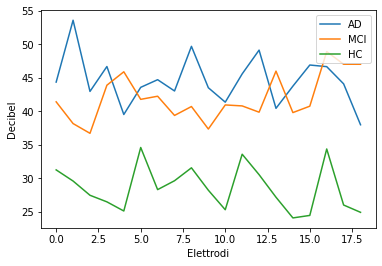

In [ ]:
sx=list(range(19))


fig, ax = plt.subplots()  
ax.plot(sx, y1d, label='AD')  
ax.plot(sx, y2d, label='MCI') 
ax.plot(sx, y3d, label='HC')  
 
ax.set_xlabel('Elettrodi') 
ax.set_ylabel('Decibel')  
#ax.set_title("Confronto andamento medio PM10 Citta di Milano") 
ax.legend()  
#plt.show()
plt.savefig("grafico 2 Andamento Potenza 7 hz")



### Grafico 3 

In [ ]:
x1 = np.linspace(0, 19, len(y1), endpoint=True)
x2 = np.linspace(0, 19,len(y2), endpoint=True)
x3 = np.linspace(0, 19,len(y3), endpoint=True)

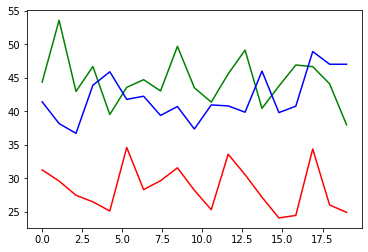

In [ ]:


plt.plot(x1, y1d, 'g')
plt.plot(x2, y2d, 'b')
plt.plot(x3, y3d, 'r')

plt.show()

### preprazioni dati

In [ ]:
matriceAD = np.zeros((len(y1),2))
matriceMCI = np.zeros((len(y2),2))
matriceHC = np.zeros((len(y3),2))


In [ ]:
matriceADHC = np.zeros((len(y1)+len(y3),2))
matriceMCIHC = np.zeros((len(y2)+len(y3),2))
matriceADMCI = np.zeros((len(y1)+len(y2),2))
matriceCASEHC = np.zeros((len(y2)+len(y3)+len(y1),2))

In [ ]:
for i in range(len(y1)):
      matriceAD[i,0]=y1[i]
      matriceAD[i,1]=1

In [ ]:
for i in range(len(y2)):
      matriceMCI[i,0]=y2[i]
      matriceMCI[i,1]=2

In [ ]:
for i in range(len(y3)):
      matriceHC[i,0]=y3[i]
      matriceHC[i,1]=3

In [ ]:
AD=pd.DataFrame(matriceAD)
HC=pd.DataFrame(matriceHC)
MCI=pd.DataFrame(matriceMCI)

In [ ]:
ADHC=AD.copy()
ADHC=ADHC.append(HC,ignore_index=True)

In [ ]:
ADMCI=AD.copy()
ADMCI=ADMCI.append(MCI,ignore_index=True)

In [ ]:
MCIHC=MCI.copy()
MCIHC=MCIHC.append(HC,ignore_index=True)

In [ ]:
CASEHC=AD.copy()
CASEHC=CASEHC.append(MCI,ignore_index=True)
CASEHC=CASEHC.append(HC,ignore_index=True)

## Valutazione modello con frequenza di taglio a 7 hz

### Caso1 AD vs HCF

#### 10 RUN

In [ ]:
for i in range(10):
    df=ADHC.loc[:,0]

    X = df.to_numpy()

    Y = ADHC.loc[:,1]
    y = Y.to_numpy()
    y = np.where(y == 1, 1, 0)
    #from sklearn.model_selection import train_test_split


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

    #pca = PCA(n_components=2)

    #X_train_pca = pca.fit_transform(X_train)
    #X_test_pca = pca.transform(X_test)

    X_train_caso1=X_train
    X_test_caso1=X_test
    y_train_caso1=y_train
    y_test_caso1=y_test
    X_train_caso1=X_train_caso1.reshape(-1,1)
    X_test_caso1=X_test_caso1.reshape(-1,1)
    y_train_caso1=y_train_caso1.reshape(-1,1)
    y_test_caso1=y_test_caso1.reshape(-1,1)
    tuning_albero_decisione(1,5)
    tuning_SVM(1,5)
    tuning_KNN(1,5)

stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.960
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.960
{'kernel': 'linear', 'gamma': 0.001, 'C': 100.0}
Accuratezza con dati 

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.920
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.967
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  97 out of 100 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.967
{'kernel': 'linear', 'gamma': 0.0001, 'C': 100.0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - KNeighborsClassifier
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.967
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear', 'gamma': 1000.0, 'C': 1.0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - KNeighborsClassifier
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.960
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 1065 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear', 'gamma': 1000.0, 'C': 0.0001}
Accuratezza con dat

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 0.917
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12

[[6 0]
 [1 5]]
Accuratezza Test: 91.000
Precisione  Test: 85.000
Sensitività Test: 100.000
Specificità Test: 83.000
F1 score    Test: 91.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1018 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear', 'gamma': 1.0, 'C': 10.0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - KNeighborsClassifier
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.920
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.960
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.960
{'kernel': 'linear', 'gamma': 0.1, 'C': 1.0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - KNeighborsClassifier
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.920
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.917
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12

[[6 0]
 [1 5]]
Accuratezza Test: 91.000
Precisione  Test: 85.000
Sensitività Test: 100.000
Specificità Test: 83.000
F1 score    Test: 91.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  77 out of  80 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear', 'gamma': 1.0, 'C': 0.01}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - KNeighborsClassifier
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.960
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precisio

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear', 'gamma': 1.0, 'C': 0.0001}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - KNeighborsClassifier
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.967
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precis

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1064 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear', 'gamma': 0.01, 'C': 10.0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - KNeighborsClassifier
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.960
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.960
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.960
{'kernel': 'linear', 'gamma': 0.0001, 'C': 0.001}
Accuratezza con dati

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.960
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.917
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12

[[6 0]
 [1 5]]
Accuratezza Test: 91.000
Precisione  Test: 85.000
Sensitività Test: 100.000
Specificità Test: 83.000
F1 score    Test: 91.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



#### Run Singolo


In [ ]:
df=ADHC.loc[:,0]

X = df.to_numpy()

Y = ADHC.loc[:,1]
y = Y.to_numpy()

In [ ]:
y = np.where(y == 1, 1, 0)

In [ ]:
df=ADHC.loc[:,0]

X = df.to_numpy()

Y = ADHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 1, 1, 0)
#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso1=X_train
X_test_caso1=X_test
y_train_caso1=y_train
y_test_caso1=y_test



In [ ]:
X_train_caso1=X_train_caso1.reshape(-1,1)
X_test_caso1=X_test_caso1.reshape(-1,1)
y_train_caso1=y_train_caso1.reshape(-1,1)
y_test_caso1=y_test_caso1.reshape(-1,1)


In [ ]:
tuning_albero_decisione(1,5)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done 960 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.1s finished


In [ ]:
tuning_SVM(1,5)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_foresta(1,10)

In [ ]:
#tuning_albero_decisione_CV(1,10)

In [ ]:
#tuning_SVM_CV(1,10)

In [ ]:
#validazione_incrociata_kfold(1,10,1)

In [ ]:
#validazione_incrociata_kfold(1,10,2)

In [ ]:
#validazione_incrociata_score(1,10,1)

In [ ]:
#validazione_incrociata_score(1,10,2)

In [ ]:
#prova_pipeline(1,2)

In [ ]:
tuning_KNN(1,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.920
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(1,5)

In [ ]:
#tuning_LR(1,5)

In [ ]:
#tuning_foresta(1,5)

### Caso2 AD vs MCI

#### 10 RUN 

In [ ]:
for i in range(10):
    df=ADMCI.loc[:,0]

    X = df.to_numpy()

    Y = ADMCI.loc[:,1]
    y = Y.to_numpy()
    y = np.where(y == 1, 1, 0)
    #from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

    #pca = PCA(n_components=5)

    #X_train_pca = pca.fit_transform(X_train)
    #X_test_pca = pca.transform(X_test)

    X_train_caso2=X_train
    X_test_caso2=X_test
    y_train_caso2=y_train
    y_test_caso2=y_test
    X_train_caso2=X_train_caso2.reshape(-1,1)
    X_test_caso2=X_test_caso2.reshape(-1,1)
    y_train_caso2=y_train_caso2.reshape(-1,1)
    y_test_caso2=y_test_caso2.reshape(-1,1)

    tuning_albero_decisione(2,5)
    tuning_SVM(2,5)
    tuning_KNN(2,5)

stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1038 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    2.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.693
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.417
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.40      0.33      0.36         6
           1       0.43      0.50      0.46         6

    accuracy                           0.42        12
   macro avg       0.41      0.42      0.41        12
weighted avg       0.41      0.42      0.41        12

[[2 4]
 [3 3]]
Accuratezza Test: 41.000
Precisione  Test: 40.000
Sensitività Test: 33.000
Specificità Test: 50.000
F1 score    Test: 36.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   27.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.773
{'kernel': 'linear'}
Accuratezza con dati di Test: 0.583
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.57      0.67      0.62         6

    accuracy                           0.58        12
   macro avg       0.59      0.58      0.58        12
weighted avg       0.59      0.58      0.58        12

[[3 3]
 [2 4]]
Accuratezza Test: 58.000
Precisione  Test: 60.000
Sensitività Test: 50.000
Specificità Test: 66.000
F1 score    Test: 54.000
stimatore utilizzato - KNeighborsClassifier
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.813
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.583
Risultato sui dati di test:


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.57      0.67      0.62         6

    accuracy                           0.58        12
   macro avg       0.59      0.58      0.58        12
weighted avg       0.59      0.58      0.58        12

[[3 3]
 [2 4]]
Accuratezza Test: 58.000
Precisione  Test: 60.000
Sensitività Test: 50.000
Specificità Test: 66.000
F1 score    Test: 54.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 1021 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.733
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.583
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.56      0.83      0.67         6

    accuracy                           0.58        12
   macro avg       0.61      0.58      0.56        12
weighted avg       0.61      0.58      0.56        12

[[2 4]
 [1 5]]
Accuratezza Test: 58.000
Precisione  Test: 66.000
Sensitività Test: 33.000
Specificità Test: 83.000
F1 score    Test: 44.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.5min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.613
{'kernel': 'linear'}
Accuratezza con dati di Test: 0.750
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.71      0.83      0.77         6

    accuracy                           0.75        12
   macro avg       0.76      0.75      0.75        12
weighted avg       0.76      0.75      0.75        12

[[4 2]
 [1 5]]
Accuratezza Test: 75.000
Precisione  Test: 80.000
Sensitività Test: 66.000
Specificità Test: 83.000
F1 score    Test: 72.000
stimatore utilizzato - KNeighborsClassifier
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.727
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 0.667
Risultato sui dati di test:
              precision    recall  f1-score   suppor

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.620
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.50      0.50      0.50         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.50        12
weighted avg       0.50      0.50      0.50        12

[[3 3]
 [3 3]]
Accuratezza Test: 50.000
Precisione  Test: 50.000
Sensitività Test: 50.000
Specificità Test: 50.000
F1 score    Test: 50.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.1min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.580
{'kernel': 'linear'}
Accuratezza con dati di Test: 0.583
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.55      1.00      0.71         6

    accuracy                           0.58        12
   macro avg       0.77      0.58      0.50        12
weighted avg       0.77      0.58      0.50        12

[[1 5]
 [0 6]]
Accuratezza Test: 58.000
Precisione  Test: 100.000
Sensitività Test: 16.000
Specificità Test: 100.000
F1 score    Test: 27.000
stimatore utilizzato - KNeighborsClassifier
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.693
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.667
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.67      0.67      0.67         6

    accuracy                           0.67        12
   macro avg       0.67      0.67      0.67        12
weighted avg       0.67      0.67      0.67        12

[[4 2]
 [2 4]]
Accuratezza Test: 66.000
Precisione  Test: 66.000
Sensitività Test: 66.000
Specificità Test: 66.000
F1 score    Test: 66.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 1065 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.620
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.417
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.40      0.33      0.36         6
           1       0.43      0.50      0.46         6

    accuracy                           0.42        12
   macro avg       0.41      0.42      0.41        12
weighted avg       0.41      0.42      0.41        12

[[2 4]
 [3 3]]
Accuratezza Test: 41.000
Precisione  Test: 40.000
Sensitività Test: 33.000
Specificità Test: 50.000
F1 score    Test: 36.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.4min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.653
{'kernel': 'linear'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.50      0.33      0.40         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.49        12
weighted avg       0.50      0.50      0.49        12

[[4 2]
 [4 2]]
Accuratezza Test: 50.000
Precisione  Test: 50.000
Sensitività Test: 66.000
Specificità Test: 33.000
F1 score    Test: 56.000
stimatore utilizzato - KNeighborsClassifier
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.693
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.583
Risultato sui dati di test:


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.60      0.50      0.55         6

    accuracy                           0.58        12
   macro avg       0.59      0.58      0.58        12
weighted avg       0.59      0.58      0.58        12

[[4 2]
 [3 3]]
Accuratezza Test: 58.000
Precisione  Test: 57.000
Sensitività Test: 66.000
Specificità Test: 50.000
F1 score    Test: 61.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.687
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.583
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.56      0.83      0.67         6
           1       0.67      0.33      0.44         6

    accuracy                           0.58        12
   macro avg       0.61      0.58      0.56        12
weighted avg       0.61      0.58      0.56        12

[[5 1]
 [4 2]]
Accuratezza Test: 58.000
Precisione  Test: 55.000
Sensitività Test: 83.000
Specificità Test: 33.000
F1 score    Test: 66.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   46.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.760
{'kernel': 'linear'}
Accuratezza con dati di Test: 0.667
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.67      0.67      0.67         6

    accuracy                           0.67        12
   macro avg       0.67      0.67      0.67        12
weighted avg       0.67      0.67      0.67        12

[[4 2]
 [2 4]]
Accuratezza Test: 66.000
Precisione  Test: 66.000
Sensitività Test: 66.000
Specificità Test: 66.000
F1 score    Test: 66.000
stimatore utilizzato - KNeighborsClassifier
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.647
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.583
Risultato sui dati di test:
              precision    recall  f1-score   support

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza Test: 58.000
Precisione  Test: 55.000
Sensitività Test: 83.000
Specificità Test: 33.000
F1 score    Test: 66.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 1065 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.700
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.333
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         6
           1       0.33      0.33      0.33         6

    accuracy                           0.33        12
   macro avg       0.33      0.33      0.33        12
weighted avg       0.33      0.33      0.33        12

[[2 4]
 [4 2]]
Accuratezza Test: 33.000
Precisione  Test: 33.000
Sensitività Test: 33.000
Specificità Test: 33.000
F1 score    Test: 33.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   34.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.627
{'kernel': 'rbf'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.50      0.33      0.40         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.49        12
weighted avg       0.50      0.50      0.49        12

[[4 2]
 [4 2]]
Accuratezza Test: 50.000
Precisione  Test: 50.000
Sensitività Test: 66.000
Specificità Test: 33.000
F1 score    Test: 56.000
stimatore utilizzato - KNeighborsClassifier
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.660
{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'distance'}
Accuratezza con dati di Test: 0.667
Risultato sui dati di test:
              precision    recall  f1-score   support


[Parallel(n_jobs=-1)]: Done 1065 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.580
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.667
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.75      0.50      0.60         6

    accuracy                           0.67        12
   macro avg       0.69      0.67      0.66        12
weighted avg       0.69      0.67      0.66        12

[[5 1]
 [3 3]]
Accuratezza Test: 66.000
Precisione  Test: 62.000
Sensitività Test: 83.000
Specificità Test: 50.000
F1 score    Test: 70.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   22.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.720
{'kernel': 'linear'}
Accuratezza con dati di Test: 0.750
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.71      0.83      0.77         6

    accuracy                           0.75        12
   macro avg       0.76      0.75      0.75        12
weighted avg       0.76      0.75      0.75        12

[[4 2]
 [1 5]]
Accuratezza Test: 75.000
Precisione  Test: 80.000
Sensitività Test: 66.000
Specificità Test: 83.000
F1 score    Test: 72.000
stimatore utilizzato - KNeighborsClassifier
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.693
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 0.667
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.67      0.67      0.67         6

    accuracy                           0.67        12
   macro avg       0.67      0.67      0.67        12
weighted avg       0.67      0.67      0.67        12

[[4 2]
 [2 4]]
Accuratezza Test: 66.000
Precisione  Test: 66.000
Sensitività Test: 66.000
Specificità Test: 66.000
F1 score    Test: 66.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.580
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.50      0.67      0.57         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.49        12
weighted avg       0.50      0.50      0.49        12

[[2 4]
 [2 4]]
Accuratezza Test: 50.000
Precisione  Test: 50.000
Sensitività Test: 33.000
Specificità Test: 66.000
F1 score    Test: 39.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   21.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.540
{'kernel': 'linear'}
Accuratezza con dati di Test: 0.750
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.50      0.67         6

    accuracy                           0.75        12
   macro avg       0.83      0.75      0.73        12
weighted avg       0.83      0.75      0.73        12

[[6 0]
 [3 3]]
Accuratezza Test: 75.000
Precisione  Test: 66.000
Sensitività Test: 100.000
Specificità Test: 50.000
F1 score    Test: 79.000
stimatore utilizzato - KNeighborsClassifier
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.620
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 0.667
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.75      0.50      0.60         6

    accuracy                           0.67        12
   macro avg       0.69      0.67      0.66        12
weighted avg       0.69      0.67      0.66        12

[[5 1]
 [3 3]]
Accuratezza Test: 66.000
Precisione  Test: 62.000
Sensitività Test: 83.000
Specificità Test: 50.000
F1 score    Test: 70.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.767
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.417
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.43      0.50      0.46         6
           1       0.40      0.33      0.36         6

    accuracy                           0.42        12
   macro avg       0.41      0.42      0.41        12
weighted avg       0.41      0.42      0.41        12

[[3 3]
 [4 2]]
Accuratezza Test: 41.000
Precisione  Test: 42.000
Sensitività Test: 50.000
Specificità Test: 33.000
F1 score    Test: 45.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   25.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.733
{'kernel': 'rbf'}
Accuratezza con dati di Test: 0.583
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.57      0.67      0.62         6

    accuracy                           0.58        12
   macro avg       0.59      0.58      0.58        12
weighted avg       0.59      0.58      0.58        12

[[3 3]
 [2 4]]
Accuratezza Test: 58.000
Precisione  Test: 60.000
Sensitività Test: 50.000
Specificità Test: 66.000
F1 score    Test: 54.000
stimatore utilizzato - KNeighborsClassifier
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.733
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.417
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.40      0.33      0.36         6
           1       0.43      0.50      0.46         6

    accuracy                           0.42        12
   macro avg       0.41      0.42      0.41        12
weighted avg       0.41      0.42      0.41        12

[[2 4]
 [3 3]]
Accuratezza Test: 41.000
Precisione  Test: 40.000
Sensitività Test: 33.000
Specificità Test: 50.000
F1 score    Test: 36.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.687
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.50      0.67      0.57         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.49        12
weighted avg       0.50      0.50      0.49        12

[[2 4]
 [2 4]]
Accuratezza Test: 50.000
Precisione  Test: 50.000
Sensitività Test: 33.000
Specificità Test: 66.000
F1 score    Test: 39.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.687
{'kernel': 'rbf'}
Accuratezza con dati di Test: 0.333
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.40      0.67      0.50         6
           1       0.00      0.00      0.00         6

    accuracy                           0.33        12
   macro avg       0.20      0.33      0.25        12
weighted avg       0.20      0.33      0.25        12

[[4 2]
 [6 0]]
Accuratezza Test: 33.000
Precisione  Test: 40.000
Sensitività Test: 66.000
Specificità Test: 0.000
F1 score    Test: 49.000
stimatore utilizzato - KNeighborsClassifier
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.727
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.583
Risultato sui dati di test:
              precision    recall  f1-score   support

  

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



#### Run Singolo

In [ ]:

df=ADMCI.loc[:,0]

X = df.to_numpy()

Y = ADMCI.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 1, 1, 0)
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

#pca = PCA(n_components=5)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso2=X_train
X_test_caso2=X_test
y_train_caso2=y_train
y_test_caso2=y_test


In [ ]:
X_train_caso2=X_train_caso2.reshape(-1,1)
X_test_caso2=X_test_caso2.reshape(-1,1)
y_train_caso2=y_train_caso2.reshape(-1,1)
y_test_caso2=y_test_caso2.reshape(-1,1)

In [ ]:
tuning_albero_decisione(2,5)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.573
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.667
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.67      0.67      0.67         6

    accuracy                           0.67        12
   macro avg       0.67      0.67      0.67        12
weighted avg       0.67      0.67      0.67        12

[[4 2]
 [2 4]]
Accuratezza Test: 66.000
Precisione  Test: 66.000
Sensitività Test: 66.000
Specificità Test: 66.000
F1 score    Test: 66.000


[Parallel(n_jobs=-1)]: Done 1064 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.1s finished


In [ ]:
tuning_SVM(2,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.8min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.567
{'kernel': 'linear'}
Accuratezza con dati di Test: 0.833
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.83      0.83      0.83         6

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12

[[5 1]
 [1 5]]
Accuratezza Test: 83.000
Precisione  Test: 83.000
Sensitività Test: 83.000
Specificità Test: 83.000
F1 score    Test: 83.000


In [ ]:
#tuning_foresta(2,10)

In [ ]:
#tuning_albero_decisione_CV(2,10)

In [ ]:
#tuning_SVM_CV(2,10)

In [ ]:
#validazione_incrociata_kfold(2,10,1)

In [ ]:
#validazione_incrociata_kfold(2,10,2)

In [ ]:
#validazione_incrociata_score(2,10,1)

In [ ]:
#validazione_incrociata_score(2,10,2)

In [ ]:
#prova_pipeline(2,2)

In [ ]:
#exec_trad(2,1)

In [ ]:
#exec_trad(2,2)

In [ ]:
tuning_KNN(2,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.573
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 0.667
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.75      0.50      0.60         6

    accuracy                           0.67        12
   macro avg       0.69      0.67      0.66        12
weighted avg       0.69      0.67      0.66        12

[[5 1]
 [3 3]]
Accuratezza Test: 66.000
Precisione  Test: 62.000
Sensitività Test: 83.000
Specificità Test: 50.000
F1 score    Test: 70.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(2,5)

In [ ]:
#tuning_LR(2,10)

<br>
<br>

<br>
<br>

In [ ]:
#tuning_foresta(2,5)

### Caso3 MCI vs HCF

#### 10 RUN

In [ ]:
for i in range(10):
    df=MCIHC.loc[:,0]

    X = df.to_numpy()

    Y = MCIHC.loc[:,1]
    y = Y.to_numpy()
    y = np.where(y == 2, 1, 0)

    #from sklearn.model_selection import train_test_split


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

    #pca = PCA(n_components=2)

    #X_train_pca = pca.fit_transform(X_train)
    #X_test_pca = pca.transform(X_test)

    X_train_caso3=X_train
    X_test_caso3=X_test
    y_train_caso3=y_train
    y_test_caso3=y_test
    X_train_caso3=X_train_caso3.reshape(-1,1)
    X_test_caso3=X_test_caso3.reshape(-1,1)
    y_train_caso3=y_train_caso3.reshape(-1,1)
    y_test_caso3=y_test_caso3.reshape(-1,1)

    tuning_albero_decisione(3,10)
    tuning_SVM(3,5)
    tuning_KNN(3,5)

stimatore utilizzato - DecisionTreeClassifier
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1951 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato sui d

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.960
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1951 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.920
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato sui d

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.920
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done 2074 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato sui d

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done 2074 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato sui d

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.960
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done 1972 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.967
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.960
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato sui d

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.960
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.917
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12

[[6 0]
 [1 5]]
Accuratezza Test: 91.000
Precisione  Test: 85.000
Sensitività Test: 100.000
Specificità Test: 83.000
F1 score    Test: 91.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done 1016 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato sui d

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.960
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done 2074 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato sui d

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.960
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done 1843 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato sui d

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.960
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done 2094 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.967
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.967
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato sui d

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.967
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.917
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12

[[6 0]
 [1 5]]
Accuratezza Test: 91.000
Precisione  Test: 85.000
Sensitività Test: 100.000
Specificità Test: 83.000
F1 score    Test: 91.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done 1951 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato sui d

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



#### Run Singolo

In [ ]:

df=MCIHC.loc[:,0]

X = df.to_numpy()

Y = MCIHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 2, 1, 0)

#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso3=X_train
X_test_caso3=X_test
y_train_caso3=y_train
y_test_caso3=y_test

In [ ]:
X_train_caso3=X_train_caso3.reshape(-1,1)
X_test_caso3=X_test_caso3.reshape(-1,1)
y_train_caso3=y_train_caso3.reshape(-1,1)
y_test_caso3=y_test_caso3.reshape(-1,1)

In [ ]:
tuning_albero_decisione(3,10)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.917
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12

[[6 0]
 [1 5]]
Accuratezza Test: 91.000
Precisione  Test: 85.000
Sensitività Test: 100.000
Specificità Test: 83.000
F1 score    Test: 91.000


[Parallel(n_jobs=-1)]: Done 2094 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.1s finished


In [ ]:
tuning_SVM(3,5)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear'}
Accuratezza con dati di Test: 0.917
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12

[[6 0]
 [1 5]]
Accuratezza Test: 91.000
Precisione  Test: 85.000
Sensitività Test: 100.000
Specificità Test: 83.000
F1 score    Test: 91.000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_albero_decisione_CV(3,10)

In [ ]:
#tuning_SVM_CV(3,10)

In [ ]:
#validazione_incrociata_kfold(3,10,1)

In [ ]:
#validazione_incrociata_kfold(3,10,2)

In [ ]:
#validazione_incrociata_score(3,10,1)

In [ ]:
#validazione_incrociata_score(3,10,2)

In [ ]:
#prova_pipeline(3,2)

In [ ]:
#exec_trad(3,1)

In [ ]:
#exec_trad(3,2)

In [ ]:
tuning_KNN(3,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.833
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.67      0.80         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12

[[6 0]
 [2 4]]
Accuratezza Test: 83.000
Precisione  Test: 75.000
Sensitività Test: 100.000
Specificità Test: 66.000
F1 score    Test: 85.000


[Parallel(n_jobs=-1)]: Done  77 out of  80 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(3,10)

In [ ]:
#tuning_LR(3,10)

In [ ]:
#tuning_foresta(3,10)

### Caso4 CASE vs HCF

#### 10 Run

In [ ]:
for i in range(10):
    df=CASEHC.loc[:,0]

    X = df.to_numpy()

    Y = CASEHC.loc[:,1]
    y = Y.to_numpy()
    y = np.where(y == 3, 1, 0)
    #from sklearn.model_selection import train_test_split


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

    #pca = PCA(n_components=2)

    #X_train_pca = pca.fit_transform(X_train)
    #X_test_pca = pca.transform(X_test)

    X_train_caso4=X_train
    X_test_caso4=X_test
    y_train_caso4=y_train
    y_test_caso4=y_test
    X_train_caso4=X_train_caso4.reshape(-1,1)
    X_test_caso4=X_test_caso4.reshape(-1,1)
    y_train_caso4=y_train_caso4.reshape(-1,1)
    y_test_caso4=y_test_caso4.reshape(-1,1)

    tuning_albero_decisione(4,5)
    tuning_SVM(4,5)
    tuning_KNN(4,5)

stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1065 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[12  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato s

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.889
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.75      1.00      0.86         6

    accuracy                           0.89        18
   macro avg       0.88      0.92      0.88        18
weighted avg       0.92      0.89      0.89        18

[[10  2]
 [ 0  6]]
Accuratezza Test: 88.000
Precisione  Test: 100.000
Sensitività Test: 83.000
Specificità Test: 100.000
F1 score    Test: 90.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.975
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[12  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.975
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato s

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.975
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[12  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[12  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato s

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.975
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[12  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 1065 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[12  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato s

[Parallel(n_jobs=-1)]: Done  77 out of  80 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.975
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[12  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 937 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[12  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato s

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[12  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 1064 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[12  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato s

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.944
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.86      1.00      0.92         6

    accuracy                           0.94        18
   macro avg       0.93      0.96      0.94        18
weighted avg       0.95      0.94      0.95        18

[[11  1]
 [ 0  6]]
Accuratezza Test: 94.000
Precisione  Test: 100.000
Sensitività Test: 91.000
Specificità Test: 100.000
F1 score    Test: 95.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[12  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato s

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[12  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[12  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato s

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[12  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[12  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato s

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.975
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[12  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 937 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.975
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[12  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000
stimatore utilizzato - Support vector machine (SVC)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.975
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato s

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



#### Run Singolo

In [ ]:
df=CASEHC.loc[:,0]

X = df.to_numpy()

Y = CASEHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 3, 1, 0)
#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso4=X_train
X_test_caso4=X_test
y_train_caso4=y_train
y_test_caso4=y_test

In [ ]:
X_train_caso4=X_train_caso4.reshape(-1,1)
X_test_caso4=X_test_caso4.reshape(-1,1)
y_train_caso4=y_train_caso4.reshape(-1,1)
y_test_caso4=y_test_caso4.reshape(-1,1)

In [ ]:
tuning_albero_decisione(4,5)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.975
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[12  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.2s finished


In [ ]:
tuning_SVM(4,5)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.975
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[12  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_albero_decisione_CV(4,10)

In [ ]:
#tuning_SVM_CV(4,10)

In [ ]:
#validazione_incrociata_kfold(4,10,1)

In [ ]:
#validazione_incrociata_kfold(4,10,2)

In [ ]:
#validazione_incrociata_score(4,10,1)

In [ ]:
#validazione_incrociata_score(4,10,2)

In [ ]:
#prova_pipeline(4,2)

In [ ]:
#exec_trad(4,1)

In [ ]:
#exec_trad(4,2)

In [ ]:
tuning_KNN(4,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.975
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[12  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(4,10)

In [ ]:
#tuning_LR(4,10)

In [ ]:
#tuning_foresta(4,10)

<br>
<br>